In [5]:
import pyaudio
import wave

####몇초동안 녹음할지 여기에!!
seconds = 5
def record_audio(file_name):
    audio = pyaudio.PyAudio()
    stream = audio.open(format=pyaudio.paInt16, channels=1, rate=16000, frames_per_buffer=1024, input=True)
    frames = []
    
    # Record for 5 seconds (3 * 1024 / 16000 = ~192ms so we need ~26 iterations for ~5s)
    for i in range(0, int(16000 / 1024 * seconds)):
        data = stream.read(1024)
        frames.append(data)

    # Stop and close the stream 
    stream.stop_stream()
    stream.close()

    # Terminate the PortAudio interface
    audio.terminate()

    # Save audio to a .wav file
    wave_file = wave.open(file_name, 'wb')
    wave_file.setnchannels(1)
    wave_file.setsampwidth(audio.get_sample_size(pyaudio.paInt16))
    wave_file.setframerate(16000)
    wave_file.writeframes(b''.join(frames))
    wave_file.close()

# Test the function
file_name = "Mic_test.wav"
record_audio(file_name)


# image

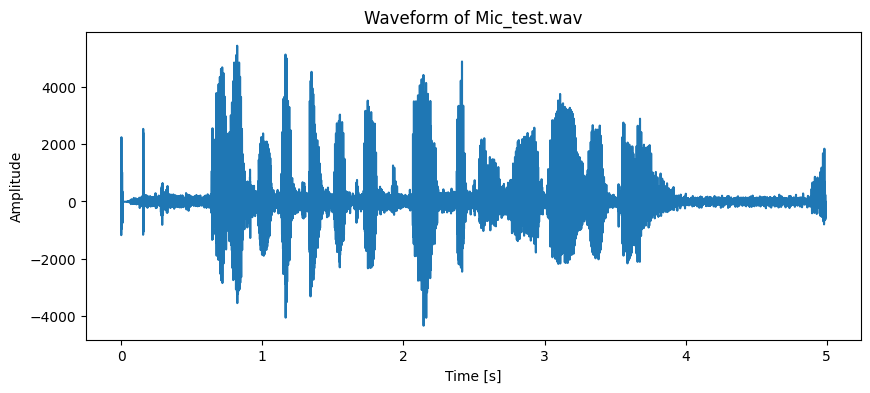

In [6]:
import matplotlib.pyplot as plt
import numpy as np

file_name = "Mic_test.wav"

# Open the file
wav_file = wave.open(file_name, 'rb')

# Read frames and convert to byte array
frame_data = wav_file.readframes(wav_file.getnframes())
wav_file.close()

# Convert binary data to integers
data = np.frombuffer(frame_data, dtype=np.int16)

# Create the time array for plotting
time = np.linspace(0., len(data) / 16000, len(data))

# Create the plot
plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform of ' + file_name)
plt.show()
